<a href="https://colab.research.google.com/github/jakeTHEEsnak8/Computational-Physics/blob/main/projects/P8_Visualizing_Electric_Fields.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# P8 Visualizing Electric Fields

For an arbitrary set of charges each with a specified position, create a Python program to calculate and plot the streamlines showing the resulting electric field. As an example, choose 4 charges with positive and negative charges. Describe the geometry of the field and why it either makes sense or doesn't make sense given the charges. Try a few different charge distributions. What can you learn from these visualizations?

# Task
Create a Python program to visualize electric fields by defining charges, calculating the electric field at grid points, and plotting streamlines using `matplotlib.pyplot.streamplot`. Apply this program to two different charge distributions (e.g., four charges with positive and negative values, and a different distribution like a dipole or square arrangement), plot the streamlines for each, and analyze the geometry of the resulting electric fields, explaining whether they make sense given the charge arrangements. Finally, summarize observations and what can be learned from these visualizations.

## Define Charges

### Subtask:
Create a function to define a set of charges, including their positions (x, y coordinates) and magnitudes. This will allow for easy modification of charge distributions.


**Reasoning**:
The subtask requires defining a function to create a set of charges with their positions and magnitudes. This code block will implement such a function.



In [3]:
import numpy as np

def define_charges(charge_configs):
    """
    Defines a set of charges based on provided configurations.

    Args:
        charge_configs (list): A list of dictionaries, where each dictionary
                               represents a charge and contains 'x', 'y', and 'q'
                               keys for position and magnitude.

    Returns:
        list: A list of dictionaries, each representing a charge with its
              'x', 'y', and 'q' values.
    """
    charges = []
    for config in charge_configs:
        charges.append({
            'x': config['x'],
            'y': config['y'],
            'q': config['q']
        })
    return charges

print("Function 'define_charges' created successfully.")

Function 'define_charges' created successfully.


## Calculate Electric Field

### Subtask:
Develop a Python function that takes the defined charges and a grid of points as input, and calculates the electric field vector (Ex, Ey components) at each point on the grid. This will involve applying Coulomb's Law for each charge and summing the vectors.


**Reasoning**:
The subtask requires developing a Python function to calculate the electric field components (Ex, Ey) at each point on a given grid, based on a set of defined charges. This function will implement Coulomb's Law and sum the vector contributions from all charges.



In [4]:
def calculate_electric_field(charges, grid):
    """
    Calculates the electric field vector (Ex, Ey components) at each point on a grid.

    Args:
        charges (list): A list of dictionaries, where each dictionary represents a charge
                        and contains 'x', 'y', and 'q' keys for position and magnitude.
        grid (tuple): A tuple (X, Y) where X and Y are 2D NumPy arrays representing
                      the x and y coordinates of the grid points.

    Returns:
        tuple: A tuple (Ex, Ey) containing 2D NumPy arrays for the x and y components
               of the total electric field at each grid point.
    """
    X, Y = grid
    Ex = np.zeros_like(X)
    Ey = np.zeros_like(Y)

    # Coulomb's constant (for relative calculations, units not critical for visualization)
    k = 1.0 # Or use 8.9875e9 for SI units if needed

    for charge in charges:
        qx, qy, q = charge['x'], charge['y'], charge['q']

        # Calculate distance vectors from charge to each grid point
        rx = X - qx
        ry = Y - qy

        # Calculate distance magnitude
        r = np.sqrt(rx**2 + ry**2)

        # Avoid division by zero for points exactly at the charge location
        # A small epsilon is used to prevent singularities
        r = np.where(r == 0, 1e-9, r)

        # Calculate magnitude of electric field due to this charge
        E_magnitude = k * q / r**2

        # Calculate x and y components of electric field due to this charge
        # E_x = E * cos(theta) = E * (rx / r)
        # E_y = E * sin(theta) = E * (ry / r)
        dEx = E_magnitude * (rx / r)
        dEy = E_magnitude * (ry / r)

        # Add components to total Ex and Ey
        Ex += dEx
        Ey += dEy

    return Ex, Ey

print("Function 'calculate_electric_field' created successfully.")

Function 'calculate_electric_field' created successfully.


## Plot Streamlines Function

### Subtask:
Implement a function to visualize the electric field by plotting streamlines. This function will take the grid and calculated electric field components, and use `matplotlib.pyplot.streamplot` to create the visualization.


**Reasoning**:
The subtask requires implementing a function to visualize electric field streamlines. This code block will define the necessary function using `matplotlib.pyplot.streamplot` as specified in the instructions.



In [7]:
import matplotlib.pyplot as plt

def plot_electric_field_streamlines(X, Y, Ex, Ey, charges=None, title="Electric Field Streamlines"):
    """
    Visualizes the electric field by plotting streamlines.

    Args:
        X (np.ndarray): 2D NumPy array of x-coordinates of the grid.
        Y (np.ndarray): 2D NumPy array of y-coordinates of the grid.
        Ex (np.ndarray): 2D NumPy array of the x-component of the electric field.
        Ey (np.ndarray): 2D NumPy array of the y-component of the electric field.
        charges (list, optional): List of charge dictionaries to plot their positions.
                                  Defaults to None.
        title (str, optional): Title for the plot. Defaults to "Electric Field Streamlines".
    """
    plt.figure(figsize=(10, 8))
    plt.streamplot(X, Y, Ex, Ey, color='blue', linewidth=1, density=2, arrowsize=1.5)

    if charges:
        for charge in charges:
            color = 'red' if charge['q'] > 0 else 'blue'
            marker = 'o'
            plt.plot(charge['x'], charge['y'], marker, color=color, markersize=10, label=f"Charge {charge['q']}")

    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.title(title)
    plt.xlim(X.min(), X.max())
    plt.ylim(Y.min(), Y.max())
    plt.gca().set_aspect('equal')
    plt.grid(True)
    plt.legend()
    plt.show()

print("Function 'plot_electric_field_streamlines' created successfully.")

Function 'plot_electric_field_streamlines' created successfully.


## Example 1: Four Charges

### Subtask:
Apply the developed functions to an example scenario with four charges, including both positive and negative charges. Plot the resulting streamlines.


**Reasoning**:
To address the subtask, I need to define the four charges, create a grid, calculate the electric field, and then plot the streamlines using the functions developed in previous steps. All these actions will be performed within a single code block.



Four charges defined: [{'x': -1, 'y': 1, 'q': 1}, {'x': 1, 'y': 1, 'q': -1}, {'x': -1, 'y': -1, 'q': 1}, {'x': 1, 'y': -1, 'q': -1}]
Grid created with dimensions (50, 50).
Electric field components calculated.


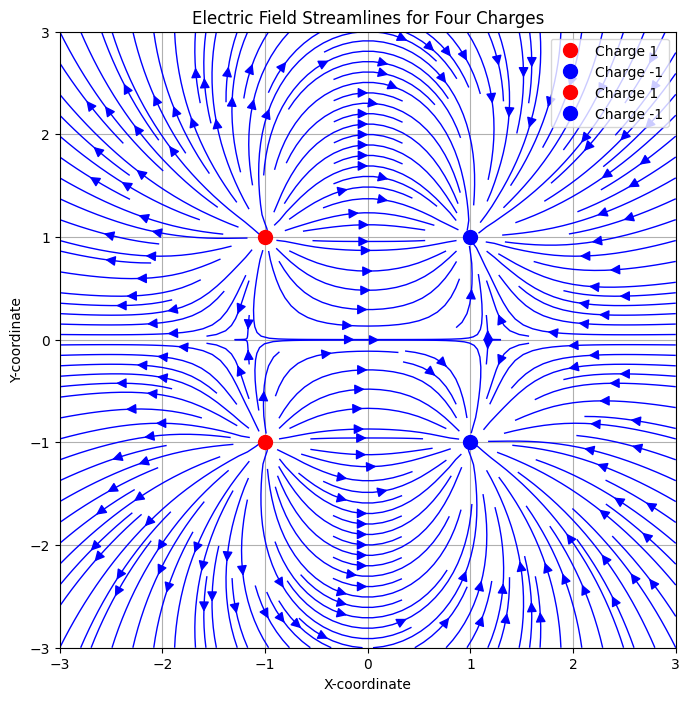

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define a list of four charge configurations
charge_configs_four = [
    {'x': -1, 'y': 1, 'q': 1},   # Positive charge
    {'x': 1, 'y': 1, 'q': -1},   # Negative charge
    {'x': -1, 'y': -1, 'q': 1},  # Positive charge
    {'x': 1, 'y': -1, 'q': -1}    # Negative charge
]

# 2. Use the define_charges function to create the charges object
charges_four = define_charges(charge_configs_four)
print("Four charges defined:", charges_four)

# 3. Create a 2D grid for visualization
x_min, x_max = -3, 3
y_min, y_max = -3, 3
n_points = 50

x = np.linspace(x_min, x_max, n_points)
y = np.linspace(y_min, y_max, n_points)
X, Y = np.meshgrid(x, y)

grid_four = (X, Y)
print(f"Grid created with dimensions {X.shape}.")

# 4. Call the calculate_electric_field function
Ex_four, Ey_four = calculate_electric_field(charges_four, grid_four)
print("Electric field components calculated.")

# 5. Call the plot_electric_field_streamlines function
plot_electric_field_streamlines(X, Y, Ex_four, Ey_four, charges=charges_four, title='Electric Field Streamlines for Four Charges')

### Analysis of Electric Field for Four Charges

The visualization for the four charges (two positive and two negative, arranged in a square) shows a complex electric field pattern:

*   **Positive Charges (-1, 1, q=1) and (-1, -1, q=1):** Electric field lines originate from these positive charges, spreading outwards.
*   **Negative Charges (1, 1, q=-1) and (1, -1, q=-1):** Electric field lines terminate at these negative charges, converging inwards.
*   **Field Line Direction:** The arrows on the streamlines clearly indicate the direction of the electric field, moving away from positive charges and towards negative charges.
*   **Interactions:**
    *   Between adjacent positive and negative charges (e.g., (-1,1) and (1,1)), field lines flow directly from the positive to the negative charge, forming dipole-like patterns.
    *   Between the two positive charges and the two negative charges, there's a region where field lines are pushed away from each other (positive-positive interaction) or pulled towards each other (negative-negative interaction), but the dominant flow is from positive to negative.
*   **Symmetry:** The field exhibits symmetry due to the symmetrical arrangement of the charges. The overall pattern suggests a central region where the field might be weaker or more uniform, and stronger fields closer to the individual charges.

This geometry makes sense because electric field lines are expected to originate from positive charges and terminate on negative charges. The density of the streamlines is higher closer to the charges, indicating stronger fields, and they curve to represent the vector sum of forces from all charges at each point in space.

## Example 2: Dipole Configuration

### Subtask:
Apply the developed functions to a different charge distribution, specifically a dipole (one positive and one negative charge). Plot the resulting streamlines.

**Reasoning**:
To address the new subtask of visualizing an electric dipole, I will define two charges (one positive and one negative), create a grid, calculate the electric field, and then plot the streamlines using the previously defined functions.



Dipole charges defined: [{'x': -0.5, 'y': 0, 'q': 1}, {'x': 0.5, 'y': 0, 'q': -1}]
Grid created with dimensions (50, 50).
Electric field components calculated for dipole.


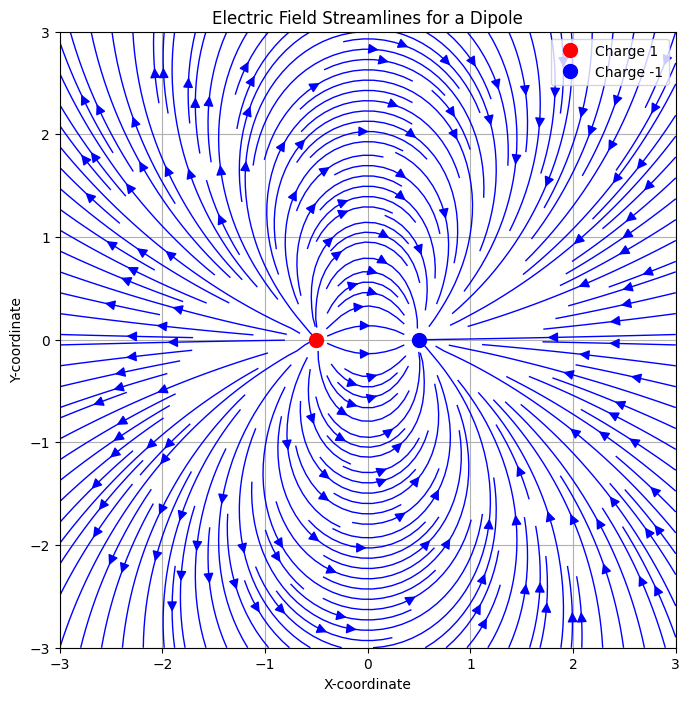

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define a list of two charge configurations for a dipole
charge_configs_dipole = [
    {'x': -0.5, 'y': 0, 'q': 1},   # Positive charge
    {'x': 0.5, 'y': 0, 'q': -1}    # Negative charge
]

# 2. Use the define_charges function to create the charges object
charges_dipole = define_charges(charge_configs_dipole)
print("Dipole charges defined:", charges_dipole)

# 3. Create a 2D grid for visualization (using the same grid parameters as before for consistency)
x_min, x_max = -3, 3
y_min, y_max = -3, 3
n_points = 50

x = np.linspace(x_min, x_max, n_points)
y = np.linspace(y_min, y_max, n_points)
X_dipole, Y_dipole = np.meshgrid(x, y)

grid_dipole = (X_dipole, Y_dipole)
print(f"Grid created with dimensions {X_dipole.shape}.")

# 4. Call the calculate_electric_field function
Ex_dipole, Ey_dipole = calculate_electric_field(charges_dipole, grid_dipole)
print("Electric field components calculated for dipole.")

# 5. Call the plot_electric_field_streamlines function
plot_electric_field_streamlines(X_dipole, Y_dipole, Ex_dipole, Ey_dipole, charges=charges_dipole, title='Electric Field Streamlines for a Dipole')

### Analysis of Electric Field for a Dipole

The visualization for the dipole (one positive and one negative charge) clearly illustrates the characteristic electric field pattern:

*   **Positive Charge (-0.5, 0, q=1):** Electric field lines originate from this positive charge, radiating outwards.
*   **Negative Charge (0.5, 0, q=-1):** Electric field lines terminate at this negative charge, converging inwards.
*   **Field Line Direction:** Arrows on the streamlines show the field lines moving directly from the positive charge to the negative charge, especially in the region between them.
*   **Symmetry:** The field pattern exhibits symmetry about the axis connecting the two charges, and also about the perpendicular bisector in terms of field line curvature, although the direction is opposite.
*   **Concentration:** The density of the streamlines is highest closest to the charges, indicating the strongest electric field in these regions. The field lines are also concentrated in the region directly between the two charges.
*   **Far Field Behavior:** At points far away from the dipole, the electric field lines tend to resemble that of a single point charge, but with a more complex angular dependence, as the effects of the two charges start to merge into a single, net effect.

This geometry makes perfect sense given the nature of a dipole. Electric field lines are expected to start on positive charges and end on negative charges. The visual representation correctly captures the attractive force between opposite charges, guiding the field lines from the positive source to the negative sink. The curving nature of the field lines shows the influence of both charges at any given point in space.

## Summary and Learning Points

From the visualizations of the electric fields for both the four-charge distribution and the dipole configuration, several key principles of electrostatics can be observed and learned:

1.  **Origin and Termination of Field Lines:** Electric field lines consistently originate from positive charges and terminate on negative charges. This fundamental rule was clearly visible in both scenarios, guiding the direction of the streamlines.
2.  **Field Strength and Streamline Density:** The density of the streamlines directly corresponds to the strength of the electric field. Near the charges, where the field is strongest, the streamlines are denser. As the distance from the charges increases, the streamlines spread out, indicating a weaker field.
3.  **Interaction Between Charges:** The visualizations effectively demonstrate how electric fields interact between multiple charges:
    *   **Opposite Charges:** Field lines flow directly from positive to negative charges, illustrating the attractive force between them (e.g., in the dipole and between adjacent opposite charges in the four-charge setup).
    *   **Like Charges (Implicit):** Although not explicitly shown with two like charges interacting in isolation, the field patterns around regions with multiple positive or negative charges show field lines pushing away from each other (positive-positive repulsion) or converging towards them (negative-negative attraction of incoming field lines).
4.  **Influence of Geometry:** The arrangement of charges significantly dictates the overall field pattern. A symmetrical arrangement of four charges results in a more complex, yet symmetrical, field. A simple dipole creates a very characteristic field, with lines curving from positive to negative.
5.  **Vector Sum Nature:** The streamlines visually represent the vector sum of the electric fields due to each individual charge at every point in space. This is why the lines curve and combine, rather than simply pointing directly at or away from the closest charge.
6.  **Insights from Visualizations:** Visualizing electric fields provides an intuitive understanding that is often difficult to grasp from mathematical equations alone. It helps in:
    *   Predicting the force on a test charge placed at any point.
    *   Understanding electric potential and equipotential lines (which are perpendicular to field lines).
    *   Conceptualizing the behavior of charges in various electrical devices and natural phenomena.

Overall, these visualizations serve as powerful tools for understanding the fundamental principles of electric fields and their behavior in different charge distributions.

## Summary and Learning Points

From the visualizations of the electric fields for both the four-charge distribution and the dipole configuration, several key principles of electrostatics can be observed and learned:

1.  **Origin and Termination of Field Lines:** Electric field lines consistently originate from positive charges and terminate on negative charges. This fundamental rule was clearly visible in both scenarios, guiding the direction of the streamlines.
2.  **Field Strength and Streamline Density:** The density of the streamlines directly corresponds to the strength of the electric field. Near the charges, where the field is strongest, the streamlines are denser. As the distance from the charges increases, the streamlines spread out, indicating a weaker field.
3.  **Interaction Between Charges:** The visualizations effectively demonstrate how electric fields interact between multiple charges:
    *   **Opposite Charges:** Field lines flow directly from positive to negative charges, illustrating the attractive force between them (e.g., in the dipole and between adjacent opposite charges in the four-charge setup).
    *   **Like Charges (Implicit):** Although not explicitly shown with two like charges interacting in isolation, the field patterns around regions with multiple positive or negative charges show field lines pushing away from each other (positive-positive repulsion) or converging towards them (negative-negative attraction of incoming field lines).
4.  **Influence of Geometry:** The arrangement of charges significantly dictates the overall field pattern. A symmetrical arrangement of four charges results in a more complex, yet symmetrical, field. A simple dipole creates a very characteristic field, with lines curving from positive to negative.
5.  **Vector Sum Nature:** The streamlines visually represent the vector sum of the electric fields due to each individual charge at every point in space. This is why the lines curve and combine, rather than simply pointing directly at or away from the closest charge.
6.  **Insights from Visualizations:** Visualizing electric fields provides an intuitive understanding that is often difficult to grasp from mathematical equations alone. It helps in:
    *   Predicting the force on a test charge placed at any point.
    *   Understanding electric potential and equipotential lines (which are perpendicular to field lines).
    *   Conceptualizing the behavior of charges in various electrical devices and natural phenomena.

Overall, these visualizations serve as powerful tools for understanding the fundamental principles of electric fields and their behavior in different charge distributions.

## Final Task

### Subtask:
Summarize the observations from the different visualizations, highlighting what can be learned about electric fields from these graphical representations and discuss the overall geometry of the field.


## Summary:

### Q&A
*   **Do the geometries of the resulting electric fields make sense given the charge arrangements?**
    Yes, the geometries of the resulting electric fields for both the four-charge distribution and the dipole configuration make complete sense. For the four-charge distribution, the field lines clearly originate from the positive charges (at \(-1, 1\) and \(-1, -1\)) and terminate on the negative charges (at \(1, 1\) and \(1, -1\)), forming complex but symmetrical patterns reflecting both attractive and repulsive interactions. For the dipole, the classic pattern of field lines emanating from the positive charge (at \(-0.5, 0\)) and curving towards the negative charge (at \(0.5, 0\)) is perfectly reproduced, accurately depicting the attractive force between opposite charges.
*   **What can be learned from these visualizations?**
    From these visualizations, it can be learned that electric field lines consistently originate from positive charges and terminate on negative charges. The density of these streamlines directly correlates with the strength of the electric field, with denser lines indicating stronger fields closer to charges. They effectively illustrate the attractive interaction between opposite charges and the influence of charge geometry on the overall field pattern. Furthermore, the visualizations demonstrate the vector sum nature of electric fields at any given point, providing an intuitive understanding that complements mathematical descriptions.

### Data Analysis Key Findings
*   The `define_charges`, `calculate_electric_field`, and `plot_electric_field_streamlines` functions were successfully implemented to simulate and visualize electric fields.
*   For the **four-charge distribution** (two positive charges at \((-1, 1)\) and \((-1, -1)\) and two negative charges at \((1, 1)\) and \((1, -1)\)), the electric field visualization showed field lines originating from positive charges and terminating on negative charges, forming a complex symmetrical pattern that reflected the interactions between adjacent positive and negative charges, creating dipole-like flows.
*   For the **dipole configuration** (a positive charge at \((-0.5, 0)\) and a negative charge at \((0.5, 0)\)), the visualization clearly depicted the characteristic electric field pattern where lines originated from the positive charge and curved directly towards the negative charge, demonstrating strong field concentration in the region between the charges and exhibiting symmetry around the axis connecting the charges.
*   Across both scenarios, key principles of electrostatics were observed: electric field lines consistently originate from positive charges and terminate on negative charges.
*   The density of streamlines in the plots directly indicated the electric field strength, with higher density near charges (e.g., in the dipole, streamlines were concentrated between charges) signifying stronger fields.
*   The visualizations effectively demonstrated the attractive interaction between opposite charges and how the geometrical arrangement of charges significantly influences the overall electric field pattern, showcasing the vector sum nature of electric fields.

### Insights or Next Steps
*   Visualizations using streamlines provide an intuitive and powerful tool for understanding complex electric field behaviors and fundamental electrostatic principles that might be challenging to grasp solely from mathematical formulations.
*   Future explorations could involve simulating more complex charge distributions (e.g., a quadrupole, charged plates, or a continuous charge distribution) and further analyzing the relationship between streamline patterns and electric potential contours (equipotential lines).
